In [5]:
import os 
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("OpenAI API key 입력: ")

OpenAI API key 입력:  ········


In [7]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

model = ChatOpenAI(model="gpt-4o-mini")

In [9]:
!pip install pypdf
from langchain.document_loaders import PyPDFLoader

# PDF 파일 경로 지정

pdf_path = "/Users/ohhalim/git_box/TIL/llm/개인과제_데이터/인공지능산업최신동향_2024년11월호.pdf"

# pypdfloder 생성
loader = PyPDFLoader(pdf_path)

# pdf 파일 로드
pages = loader.load()


  Using cached pypdf-5.1.0-py3-none-any.whl.metadata (7.2 kB)
Using cached pypdf-5.1.0-py3-none-any.whl (297 kB)


In [10]:
'''
아래 코드는 문서를 청크 단위로 나누는 함수입니다.
'''
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=100,
    chunk_overlap=20
)

chunks = text_splitter.split_documents(pages)

for i, chunk in enumerate(chunks[:50]):
    print(f"청크{i + 1}:\n{chunk}\n")

Created a chunk of size 1674, which is longer than the specified 100
Created a chunk of size 224, which is longer than the specified 100
Created a chunk of size 214, which is longer than the specified 100
Created a chunk of size 214, which is longer than the specified 100
Created a chunk of size 186, which is longer than the specified 100
Created a chunk of size 217, which is longer than the specified 100
Created a chunk of size 231, which is longer than the specified 100
Created a chunk of size 206, which is longer than the specified 100
Created a chunk of size 1020, which is longer than the specified 100
Created a chunk of size 216, which is longer than the specified 100
Created a chunk of size 220, which is longer than the specified 100
Created a chunk of size 967, which is longer than the specified 100
Created a chunk of size 186, which is longer than the specified 100
Created a chunk of size 957, which is longer than the specified 100
Created a chunk of size 212, which is longer t

청크1:
page_content='2024년 11월호' metadata={'source': '/Users/ohhalim/git_box/TIL/llm/개인과제_데이터/인공지능산업최신동향_2024년11월호.pdf', 'page': 0}

청크2:
page_content='2024년 11월호' metadata={'source': '/Users/ohhalim/git_box/TIL/llm/개인과제_데이터/인공지능산업최신동향_2024년11월호.pdf', 'page': 1}

청크3:
page_content='Ⅰ. 인공지능 산업 동향 브리프 1. 정책/법제    ▹ 미국 민권위원회, 연방정부의 얼굴인식 기술 사용에 따른 민권 영향 분석························1   ▹ 미국 백악관 예산관리국, 정부의 책임 있는 AI 조달을 위한 지침 발표·····························2   ▹ 유로폴, 법 집행에서 AI의 이점과 과제를 다룬 보고서 발간··············································3   ▹ OECD, 공공 부문의 AI 도입을 위한 G7 툴킷 발표··························································4   ▹ 세계경제포럼, 생성AI 시대의 거버넌스 프레임워크 제시····················································5  2. 기업/산업    ▹ CB인사이츠 분석 결과, 2024년 3분기 벤처 투자 31%가 AI 스타트업에 집중··············6   ▹ 메타, 동영상 생성AI 도구 ‘메타 무비 젠’ 공개···································································7   ▹ 메타, 이미지와 텍스트 처리하는 첫 멀티모달 AI 모델 ‘라마 3.2’ 공개··········

# 안 사용할 RRecursiveCharacterTextSplitter 마크다운으로 만들어 놓음
from langchain.text_splitter import RecursiveCharacterTextSplitter

# RRecursiveCharacterTextSplitter 설정
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n", ".", " "], # 우선순위 정하기: 줄바꿈 > 점 > 공백
    chunk_size=100, # 청크 최대 크기
    chunk_overlap=20 # 청크 간 겹치는 크기
)

chunks = text_splitter.split_documents(pages)

for i, chunk in enumerate(chunks[:50]):
    print(f"청크{i + 1}:\n{chunk}\n")

**4. 문서 청크로 나누기**

불러온 문서를 대상으로 아래 i, ii 청킹방법을 모두 수행하세요.

청킹을 완수하면 청킹된 내용을 상위 50개까지 출력하고, 각 청킹방식과 parameter의 뜻을 markdown으로 정리해주세요.

-----------------------------
청킹된 내용 상위 50개를 출력하였는가?

- 네
- for i, chunk in enumerate(chunks[:50]):
    print(f"청크{i + 1}:\n{chunk}\n") 로 출력함.

각 청킹방식과 parameter의 뜻은?

> CharacterTextSplitter 청킹 방식

각 파라미터의 뜻
    separator="\n"  줄바꿈을 기준으로 텍스트를 나눔
    chunk_size=100, 각 청크사이즈는 최대 100개
    chunk_overlap=20 청크간 겹치는 문자의 개수는 최대 20개

> RecursiveCharacterTextSplitter 청킹 방식

CharacterTextSplitter보다 더 세밀하게 텍스트를 나눌 수 있는 LangChain의 텍스트 분할 도구
문맥을 유지하는 청킹작업에 유용하다 함


각 파라미터의 뜻
    separators=["\n", ".", " "], # 우선순위 정하기: 줄바꿈 > 점 > 공백
    chunk_size=100, # 청크 최대 크기
    chunk_overlap=20 # 청크 간 겹치는 크기


In [15]:
print(chunk)

page_content='☞ 출처: Mistral AI, Un Ministral, des Ministraux-Introducing the world’s best edge models, 2024.10.16.' metadata={'source': '/Users/ohhalim/git_box/TIL/llm/개인과제_데이터/인공지능산업최신동향_2024년11월호.pdf', 'page': 12}


In [17]:
# 백터 임베딩 생성 
"""
OpenAI 모델의 경우 OpenAIEmbeddings을 이용해 텍스트를 벡터로 변환할 벡터 임베딩을 생성하세요.
"""

from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")


/var/folders/ln/kkrz5x5s3rq0k4s1f6vqd08c0000gn/T/ipykernel_49131/3954993186.py:7: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")


In [19]:
# 벡터 스토어 생성
"""
앞서 만든 벡터 임베딩과 청크된 문서를 활용하여 `FAISS` 벡터 스토어를 생성하세요.
"""
from langchain.vectorstores import FAISS

# FAISS 벡터 스토어 생성
vectorstore = FAISS.from_documents(
    # from_documents()는 FAISS 클래스의 클래스 메서드(class method)로, LangChain에서 제공하는 FAISS 벡터스토어를 생성하기 위한 기본 함수입니다.
    # documents, embedding 파라미터를 받아서 faiss 인덱스를 생성 한다
    # 인덱스는 백터들의 저장소임, 특정정보를 빠르게 찾을수있게 해줌
    documents=chunks,  # 청크된 문서
    embedding=embeddings  # OpenAI 임베딩
)


In [33]:
# FAISS를 Retriever로 변환
"""
RAG 체인에서 사용할 수 있도록 FAISS를 `retriever`로 변환하세요
"""
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 1})

"""
as_retriever() 메서드

벡터 스토어 객체를 retriever 객체로 변환하는 메서드입니다
문서 검색을 수행할 수 있는 인터페이스를 제공합니다.
-------------------
search_type="similarity" 파라미터

검색 방식을 지정하는 파라미터입니다
"similarity": 벡터 간 유사도 기반 검색을 수행
--------------------
search_kwargs={"k": 1} 파라미터


검색 관련 추가 매개변수를 딕셔너리 형태로 전달
"k": 검색할 결과의 개수를 지정

여기서는 k=1로 설정되어 가장 유사한 문서 1개만 반환
"""


'\nas_retriever() 메서드\n\n벡터 스토어 객체를 retriever 객체로 변환하는 메서드입니다\n문서 검색을 수행할 수 있는 인터페이스를 제공합니다.\n\n'

In [ ]:
#프롬프트 템플릿 정의** 
"""
프롬프트 템플릿은 다양한 입력을 받아 메시지를 생성하는데 도움을 준다.
예를 들어, 영어 문장을 다른 언어로 번역하는 프롬프트를 정의해 봅시다.
프롬프트 템플릿을 정의하세요.
"""
from langchain.prompts import PromptTemplate


# 시스템 메시지 설정
system_template = "Translate the following sentence from English to {language}:"

# 사용자 텍스트 입력
prompt_template = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("user", "{text}")
])

# 프롬프트 생성
result = prompt_template.invoke({"language": "French", "text": "How are you?"})
print(result.to_messages())


template = 

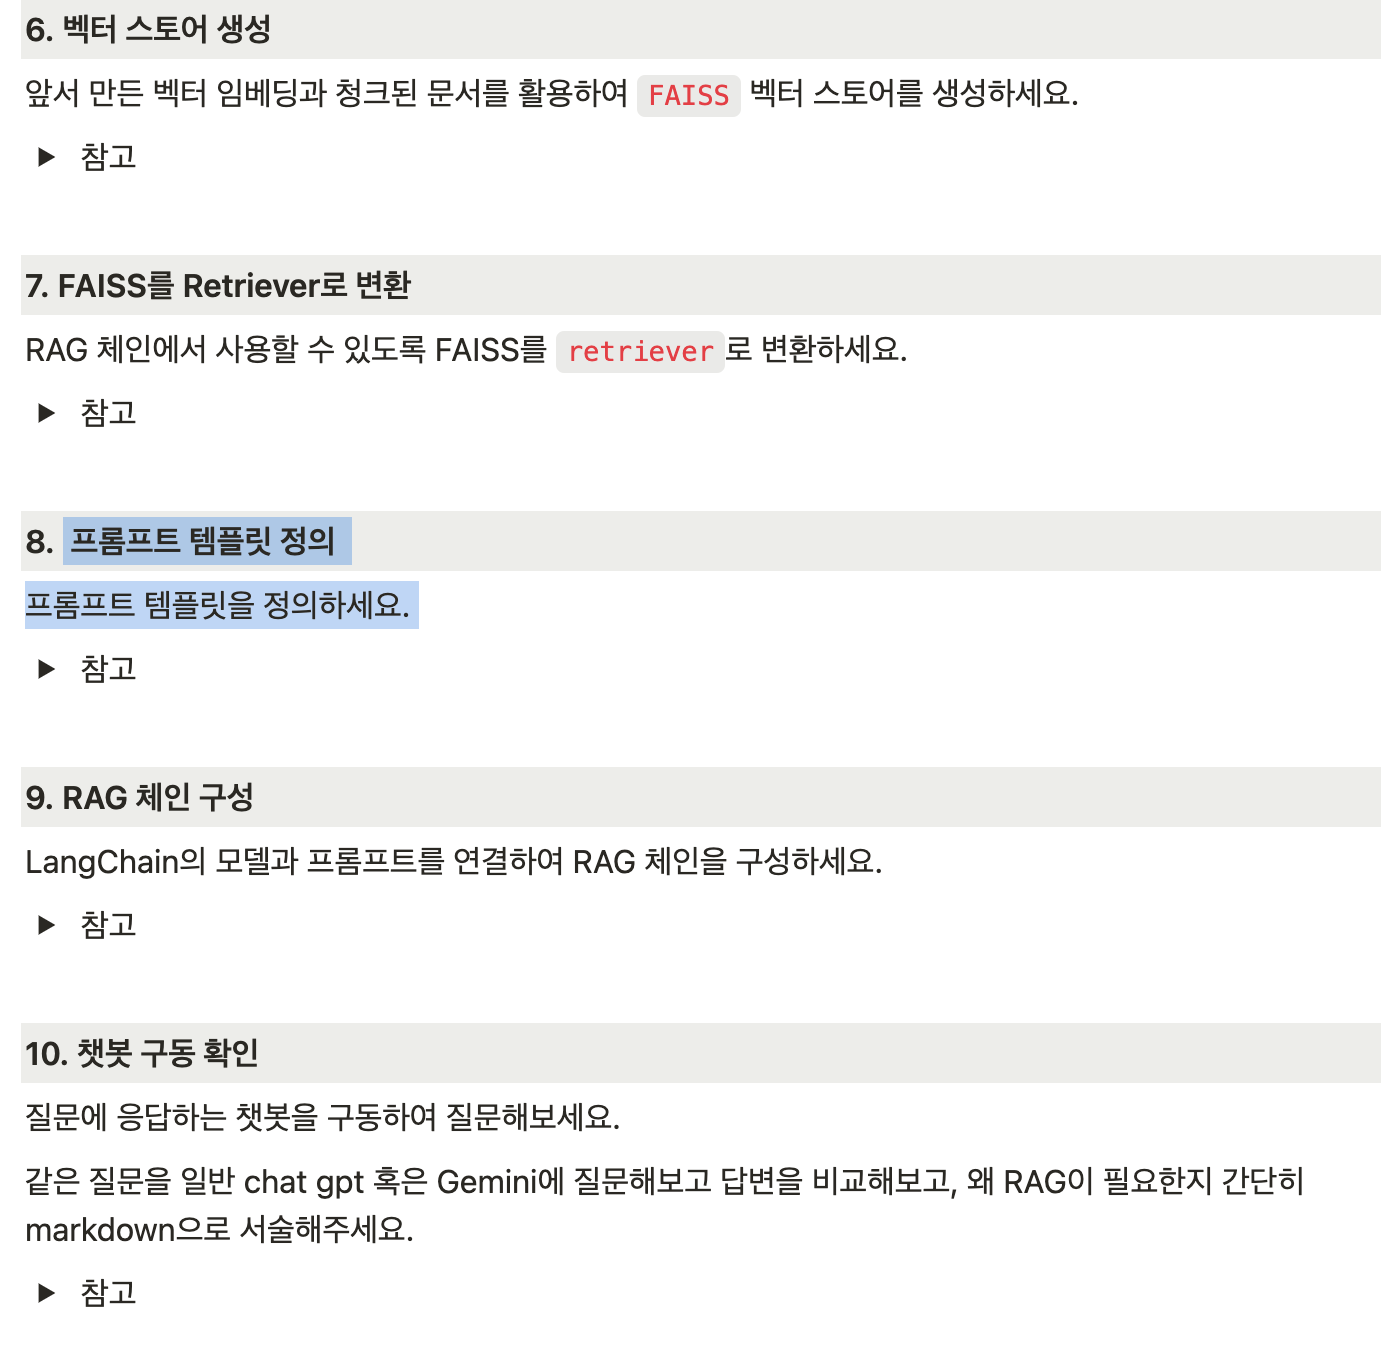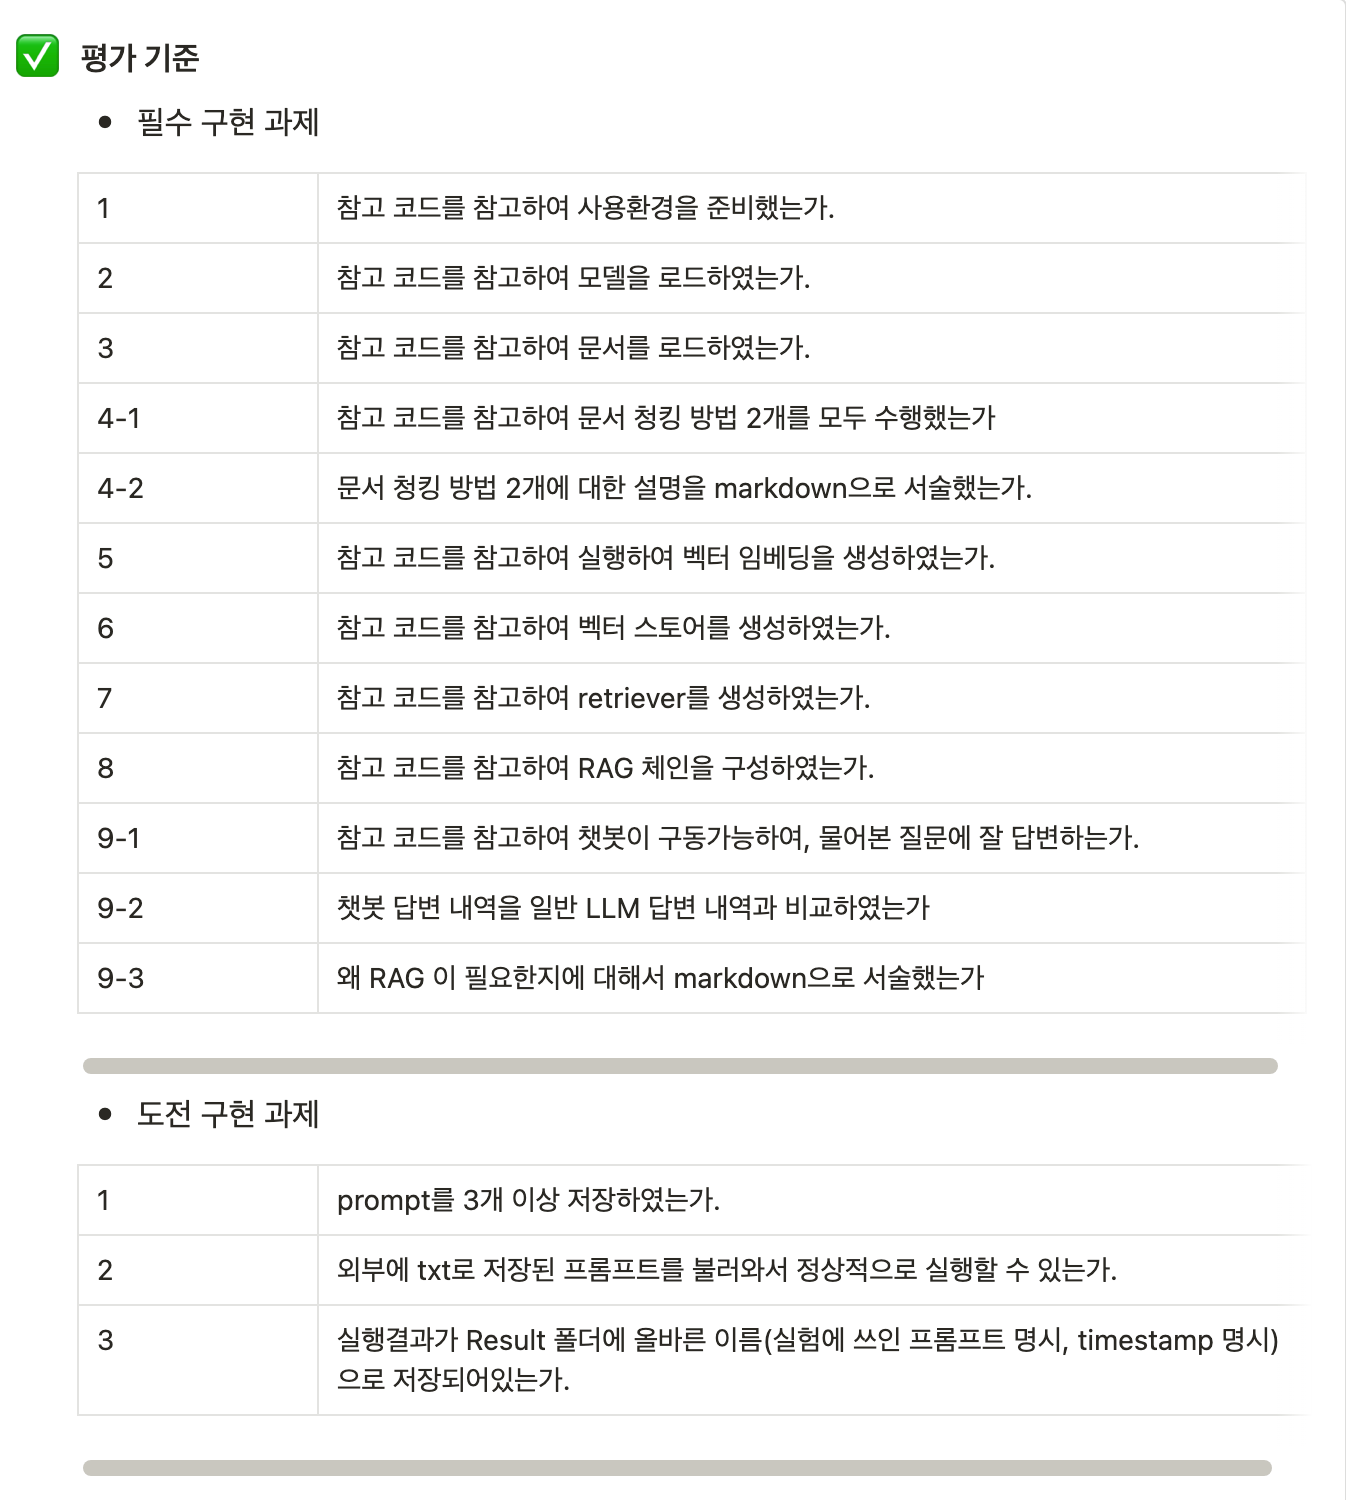